In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall, AUC

In [2]:
## Load credit card transaction dataset
df = pd.read_csv("card_transdata.csv")

## Store the data as X and y where X stores input features and y stores fraud indication
X = df.drop("fraud", axis=1).values
Y = df["fraud"].values

# seperate out 20% of data as the validation set to ensure no overfitting
X_set,X_valid, Y_set, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=30)

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size=0.2, random_state=30)

## Resample the training set to balance the classes
oversampler = SMOTE(random_state=30)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)


Test Data:
Accuracy: 0.999975
Precision: 1.0
Recall: 0.9997147339894451
F1 score: 0.9998573466476461
Validation Data:
Accuracy: 0.99998
Precision: 1.0
Recall: 0.9997713371062711
F1 score: 0.9998856554799611


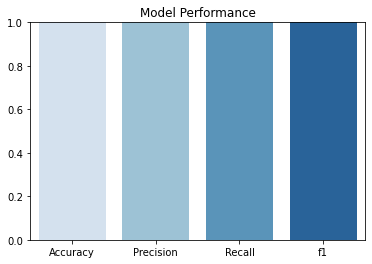

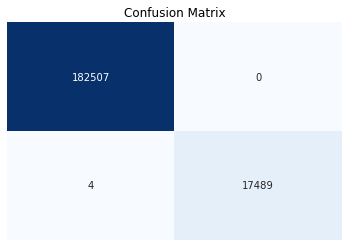

[Text(0.46875, 0.9375, 'x[2] <= 4.0\ngini = 0.159\nsamples = 640000\nvalue = [584112, 55888]'),
 Text(0.16071428571428573, 0.8125, 'x[0] <= 100.008\ngini = 0.049\nsamples = 574241\nvalue = [559909, 14332]'),
 Text(0.047619047619047616, 0.6875, 'x[1] <= 50.038\ngini = 0.012\nsamples = 545709\nvalue = [542528, 3181]'),
 Text(0.023809523809523808, 0.5625, 'gini = 0.0\nsamples = 537665\nvalue = [537665, 0]'),
 Text(0.07142857142857142, 0.5625, 'x[6] <= 0.5\ngini = 0.478\nsamples = 8044\nvalue = [4863, 3181]'),
 Text(0.047619047619047616, 0.4375, 'gini = 0.0\nsamples = 2815\nvalue = [2815, 0]'),
 Text(0.09523809523809523, 0.4375, 'x[4] <= 0.5\ngini = 0.477\nsamples = 5229\nvalue = [2048, 3181]'),
 Text(0.047619047619047616, 0.3125, 'x[5] <= 0.5\ngini = 0.194\nsamples = 3347\nvalue = [365, 2982]'),
 Text(0.023809523809523808, 0.1875, 'gini = 0.0\nsamples = 2982\nvalue = [0, 2982]'),
 Text(0.07142857142857142, 0.1875, 'gini = 0.0\nsamples = 365\nvalue = [365, 0]'),
 Text(0.14285714285714285, 

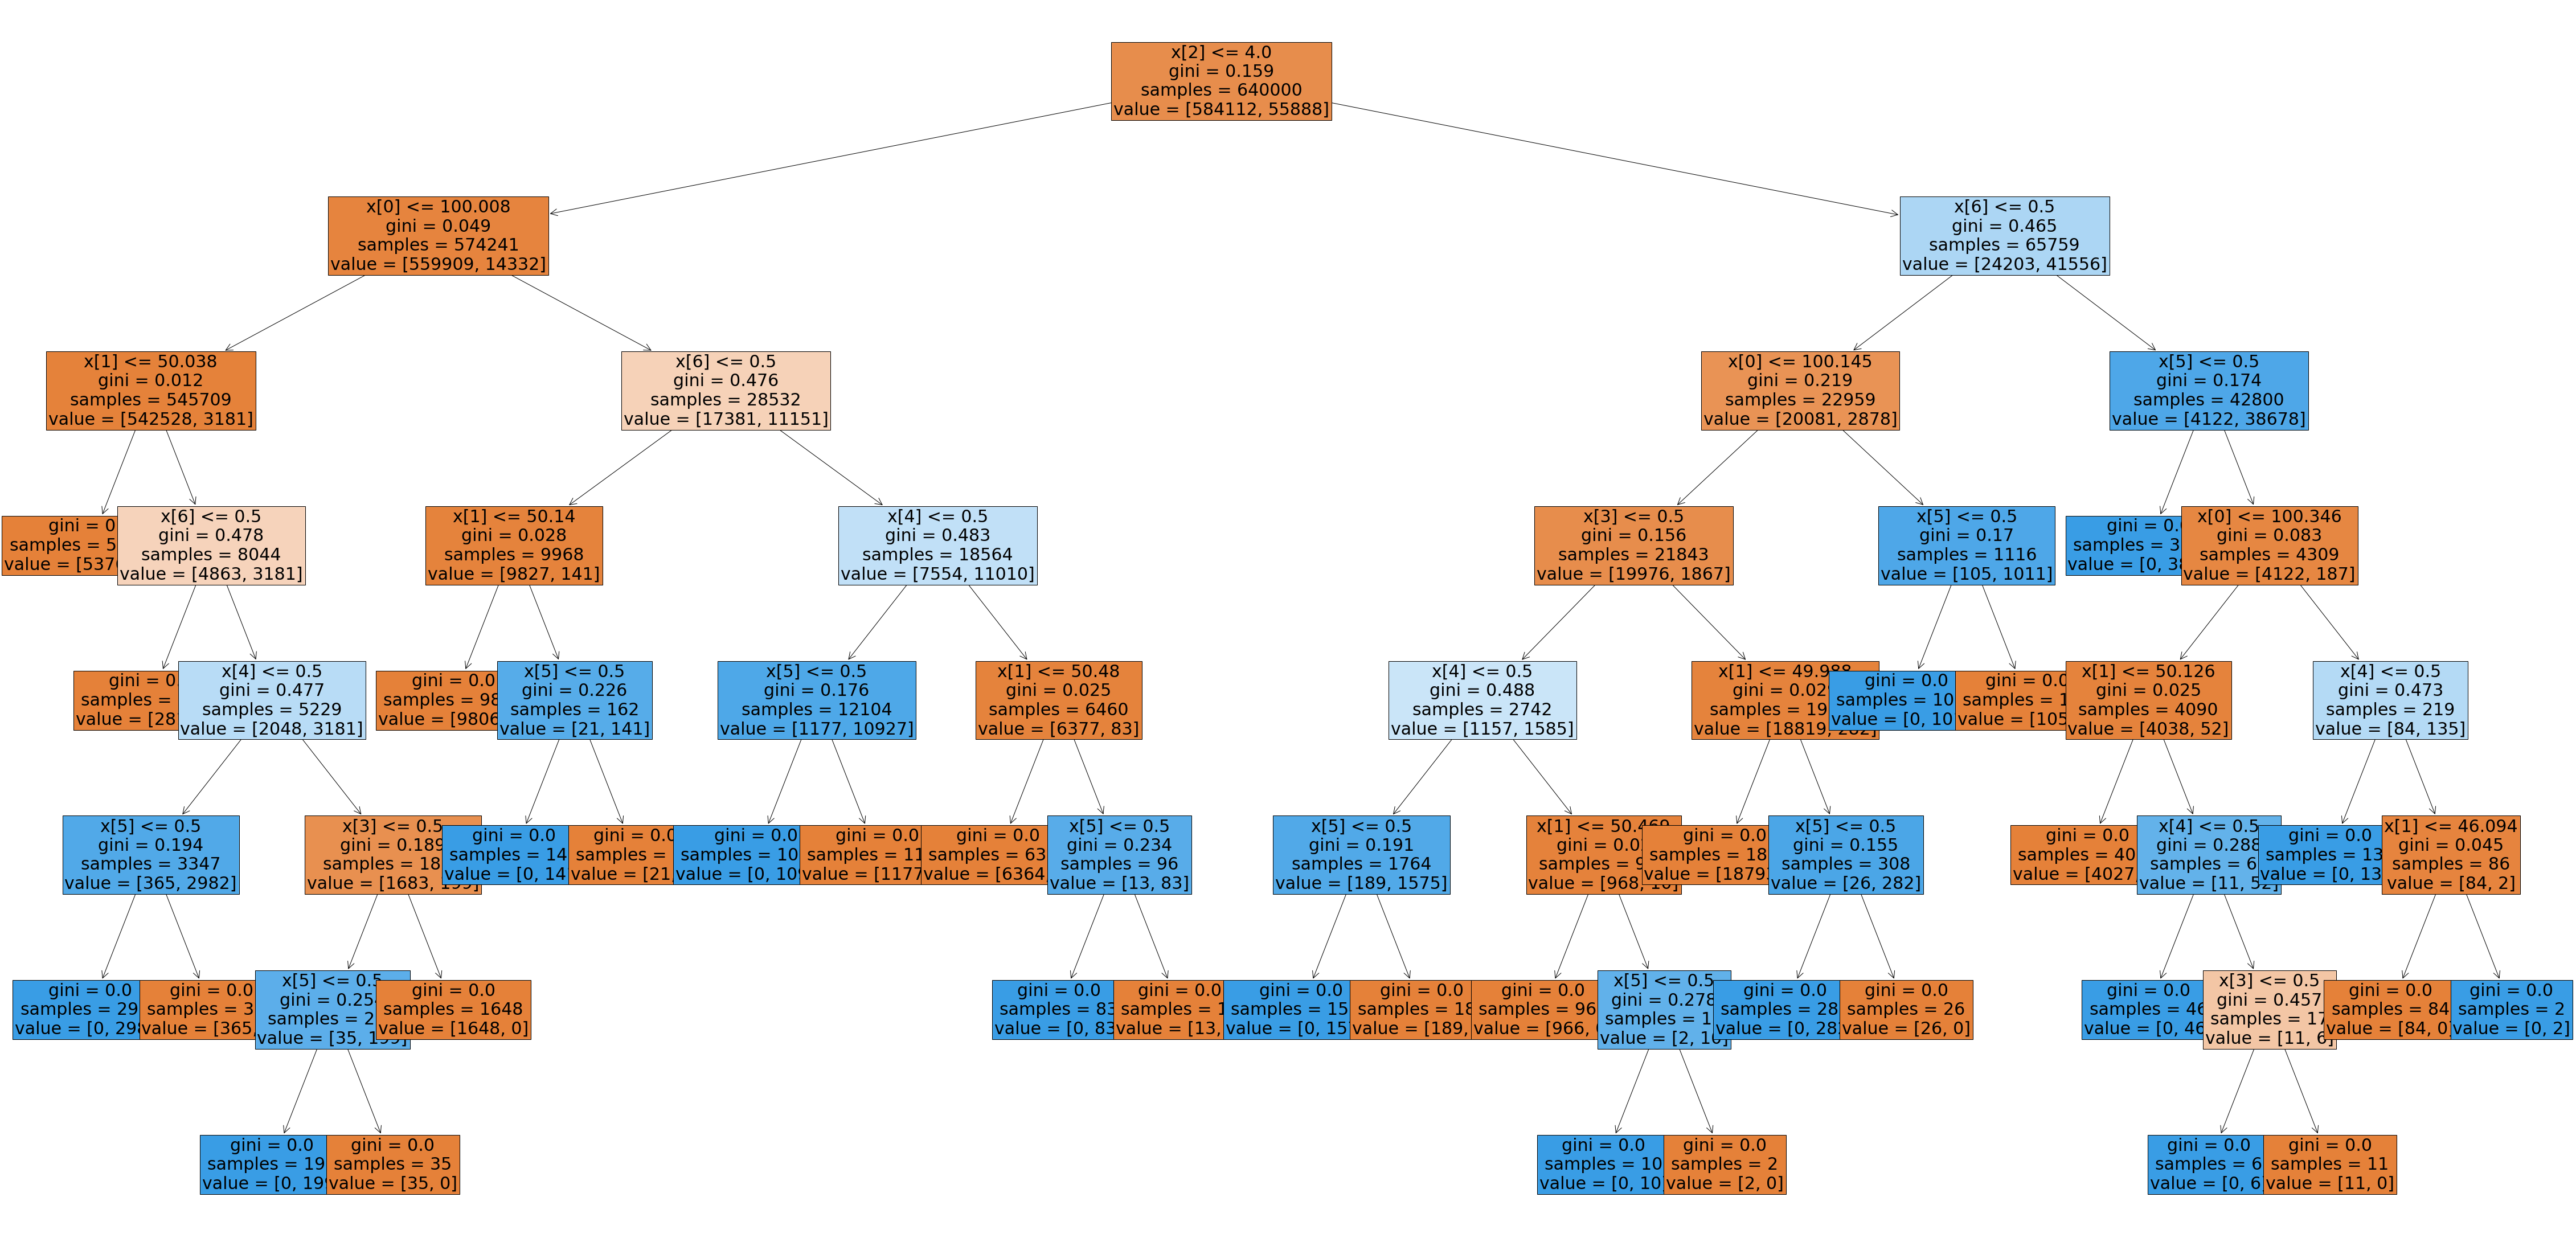

In [13]:
from sklearn import tree
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

dtc = tree.DecisionTreeClassifier(criterion ='gini')
dtc = dtc.fit(X_train, Y_train)

print("Test Data:")
y_pred_dtc = dtc.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, y_pred_dtc)
precision = metrics.precision_score(Y_test, y_pred_dtc)
recall = metrics.recall_score(Y_test, y_pred_dtc)
f1 = metrics.f1_score(Y_test, y_pred_dtc)
cm = confusion_matrix(Y_test, y_pred_dtc)

print("Accuracy:", metrics.accuracy_score(Y_test, y_pred_dtc))
print("Precision:", metrics.precision_score(Y_test, y_pred_dtc))
print("Recall:", metrics.recall_score(Y_test, y_pred_dtc))
print("F1 score:", metrics.f1_score(Y_test, y_pred_dtc))

print("Validation Data:")
y_pred_dtc_v = dtc.predict(X_valid)

accuracy = metrics.accuracy_score(Y_valid, y_pred_dtc_v)
precision = metrics.precision_score(Y_valid, y_pred_dtc_v)
recall = metrics.recall_score(Y_valid, y_pred_dtc_v)
f1 = metrics.f1_score(Y_valid, y_pred_dtc_v)
cm = confusion_matrix(Y_valid, y_pred_dtc_v)

print("Accuracy:", metrics.accuracy_score(Y_valid, y_pred_dtc_v))
print("Precision:", metrics.precision_score(Y_valid, y_pred_dtc_v))
print("Recall:", metrics.recall_score(Y_valid, y_pred_dtc_v))
print("F1 score:", metrics.f1_score(Y_valid, y_pred_dtc_v))

plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'f1'], y=[accuracy, precision, recall, f1], palette='Blues')
plt.title('Model Performance')
plt.ylim([0, 1])
plt.show()

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=False, yticklabels=False, cbar=False)
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize = (80, 40))
tree.plot_tree(dtc, filled = 'true', fontsize = 30)

Test Data:
Accuracy: 0.97413125
Precision: 0.7776591560375344
Recall: 0.9870203965197547
F1 score: 0.8699204877588862
Validation Data:
Accuracy: 0.97419
Precision: 0.7775876817792986
Recall: 0.9873092093980449
F1 score: 0.8699879105379811
[[142021   3957]
 [   182  13840]]


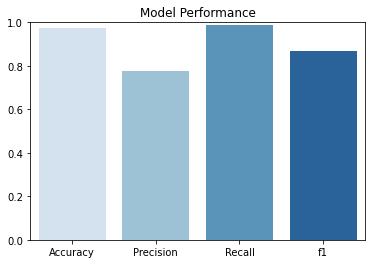

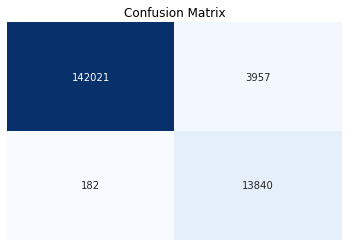

In [16]:
# Create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, Y_train_resampled)

# Predict the labels of the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# Print the results
print('Test Data:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Predict the labels of the test data
y_pred_v = knn.predict(X_valid)

# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_valid, y_pred_v)
precision = precision_score(Y_valid, y_pred_v)
recall = recall_score(Y_valid, y_pred_v)
f1 = f1_score(Y_valid, y_pred_v)


# Print the results
print('Validation Data:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

cm = confusion_matrix(Y_test, y_pred)
print(cm)

# Create a bar chart of the accuracy, precision, and recall
plt.figure(figsize=(6, 4))
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'f1'], y=[accuracy, precision, recall, f1], palette='Blues')
plt.title('Model Performance')
plt.ylim([0, 1])
plt.show()

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=False, yticklabels=False, cbar=False)
plt.title('Confusion Matrix')
plt.show()